In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install librosa
#!pip install tensorflow
import librosa
import librosa.display
import soundfile as sf
import random
import configparser
import math
#import tensorflow as tf
#import utility_functions as uf
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
!pip install audiomentations
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/extracted_features_with_labels.csv'
df = pd.read_csv(file_path)
df.head()


,zero_crossing_rate,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,...,mel_122,mel_123,mel_124,mel_125,mel_126,mel_127,pitch,energy,duration,Emotion
0,0.326416,0.741282,0.739948,0.715356,0.726539,0.693818,0.663530,0.695558,0.735384,0.751350,...,1.612789e-06,2.945220e-06,0.000005,0.000004,0.000002,1.895963e-07,1248.892212,0.321961,2.500000,neutral
1,0.324879,0.779703,0.840061,0.818958,0.820196,0.822826,0.739997,0.664894,0.715451,0.748773,...,8.244939e-05,8.466498e-05,0.000086,0.000081,0.000079,8.058231e-05,1606.978253,0.381012,2.500000,neutral
2,0.175250,0.695322,0.748651,0.716307,0.681422,0.678472,0.643956,0.654927,0.696589,0.705649,...,6.689573e-07,1.424551e-06,0.000002,0.000002,0.000001,9.805644e-08,1218.593018,0.275563,3.124989,neutral
3,0.175637,0.668272,0.713752,0.764915,0.721684,0.680005,0.684769,0.660719,0.676079,0.706635,...,1.688137e-06,9.080778e-07,0.000002,0.000003,0.000002,1.085064e-07,1282.276978,0.239171,2.500000,neutral
4,0.277000,0.683592,0.730139,0.717206,0.685079,0.682584,0.684100,0.641699,0.695920,0.722635,...,4.689035e-06,6.663165e-06,0.000005,0.000006,0.000003,1.961947e-07,1268.120117,0.347606,2.500000,neutral


In [6]:
df.shape

(6144, 186)

In [7]:
df['Emotion'].value_counts()

,count
Emotion,
neutral,768
calm,768
happy,768
sad,768
angry,768
fearful,768
disgust,768
surprised,768


In [8]:

# Convert emotion labels to numerical values
label_encoder = LabelEncoder()
df['emotion_encoded'] = label_encoder.fit_transform(df['Emotion'])

Y = df['emotion_encoded'].values
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#encoder = OneHotEncoder()
#Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [9]:
Y.shape

(6144,)

In [10]:
X = df.drop(['emotion_encoded','Emotion'],axis=1)
X.shape

(6144, 185)

In [11]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Print the shapes of the resulting sets
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set labels shape:", y_train.shape)
print("Testing set labels shape:", y_test.shape)

Training set features shape: (4300, 185)
Testing set features shape: (1844, 185)
Training set labels shape: (4300,)
Testing set labels shape: (1844,)


In [12]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming your data is in a pandas DataFrame `df`
# Separate features and labels
X = df.iloc[:, :-1]  # Features (all columns except 'emotion')
y = df['Emotion']    # Emotion labels (last column)


In [14]:
X.drop('Emotion', axis=1, inplace=True)

In [15]:

# Encode the emotion labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# List of unique emotions
emotions = label_encoder.classes_

In [16]:
y_encoded

array([5, 5, 5, ..., 5, 5, 5])

In [17]:

## One-vs-All Classification
for emotion in emotions:
  # Create binary labels for one-vs-all classification (1 for the current emotion, 0 for others)
  y_bin = np.where(y_encoded == label_encoder.transform([emotion])[0], 1, 0)

    #Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

    # Train binary classifier
  clf = SVC(kernel='linear', probability=True)
  clf.fit(X_train, y_train)

    # Predict and evaluate
  y_pred = clf.predict(X_test)
  print(f"Results for emotion: {emotion}")
  print(classification_report(y_test, y_pred))

Results for emotion: angry
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1613
           1       0.81      0.56      0.66       231

    accuracy                           0.93      1844
   macro avg       0.88      0.77      0.81      1844
weighted avg       0.92      0.93      0.92      1844

Results for emotion: calm
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1621
           1       0.70      0.53      0.60       223

    accuracy                           0.92      1844
   macro avg       0.82      0.75      0.78      1844
weighted avg       0.91      0.92      0.91      1844

Results for emotion: disgust
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1612
           1       0.76      0.15      0.25       232

    accuracy                           0.89      1844
   macro avg       0.82      0.57      0.59   

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.2 MB/s eta 0:00:00


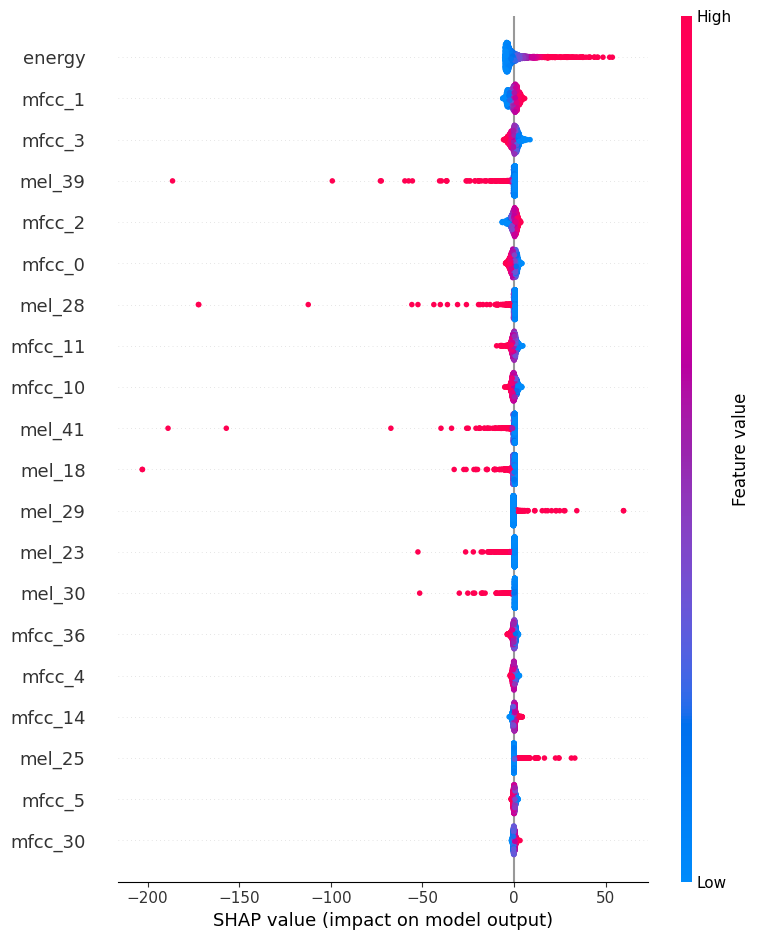

In [19]:
!pip install shap
import shap
    #Apply SHAP (use only if you have a model and data available)
#SHAP requires a fitted model and the data used to train the model
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_test)

    # Plot SHAP values for the current emotion
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Filter for 5 emotions: Angry, Neutral, Calm, fearful, Surprised
emotions_to_keep = ['angry', 'neutral', 'calm', 'fearful', 'surprised']
filtered_data = df[df['Emotion'].isin(emotions_to_keep)]

# Map emotions to integers if not already
emotion_map = {emotion: idx for idx, emotion in enumerate(emotions_to_keep)}
filtered_data['Emotion'] = filtered_data['Emotion'].map(emotion_map)

# Split features and labels
X = filtered_data.drop(columns=['Emotion','emotion_encoded'])
y = filtered_data['Emotion']


<ipython-input-21-353f9f813d0b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Emotion'] = filtered_data['Emotion'].map(emotion_map)


In [22]:
X.shape

(3840, 185)

In [23]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
y.unique()

array([1, 2, 0, 3, 4])

In [25]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training Accuracy: 1.0000
Testing Accuracy: 0.8889


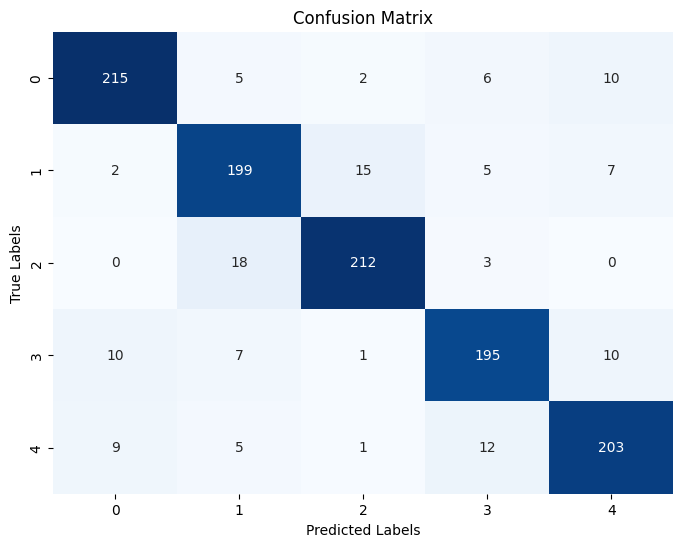

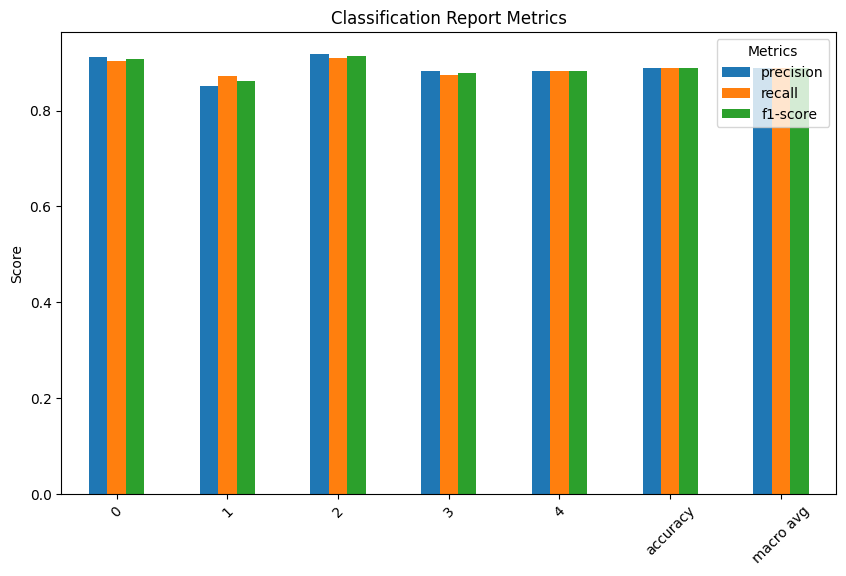

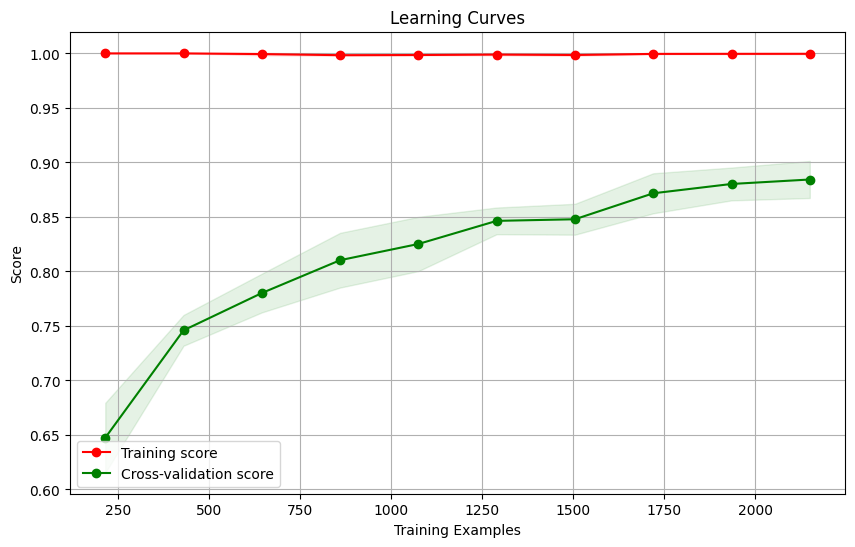

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import learning_curve

# Define base models
base_models = [
    ('svm', SVC(kernel='linear', probability=True)),
    ('rf', RandomForestClassifier()),
    ('logreg', LogisticRegression())
]

# Define meta-model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking ensemble model
stacking_clf.fit(X_train_scaled, y_train)

# Predict on test data
y_test_pred = stacking_clf.predict(X_test_scaled)
y_train_pred = stacking_clf.predict(X_train_scaled)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
report = classification_report(y_test, y_test_pred, output_dict=True)

# Bar plot for precision, recall, and F1-score
metrics_df = pd.DataFrame(report).transpose()
metrics_df.drop(['support'], axis=1, inplace=True)

plt.figure(figsize=(10, 6))
metrics_df.iloc[:-1].plot(kind='bar', ax=plt.gca())
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

# Plotting Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    stacking_clf, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and std for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

# Plot the std deviation as shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color='g', alpha=0.1)

plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [29]:
# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.8889


In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       238
           1       0.85      0.87      0.86       228
           2       0.92      0.91      0.91       233
           3       0.88      0.87      0.88       223
           4       0.88      0.88      0.88       230

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152

